1. The file BostonHousing.csv contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price (MEDV).

Import libraries

In [ ]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns


!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Exploration

In [ ]:
bh_df = pd.read_csv("BostonHousing.csv")

In [ ]:
bh_df.shape

(506, 14)

In [ ]:
bh_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [ ]:
bh_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

### a. Why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?

To avoid overfitting, data should be divided into training and validation sets. The model is trained, which enables it to discover the relationships and patterns in the data. The validation set is used to assess the model's performance during training.
<br>
<br>
<br>

###b. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

In [ ]:
variables = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

In [ ]:
x = bh_df[variables]
y = bh_df[outcome]

In [ ]:
x.head()

,CRIM,CHAS,RM
0,0.00632,0,6.575
1,0.02731,0,6.421
2,0.02729,0,7.185
3,0.03237,0,6.998
4,0.06905,0,7.147


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size= .40, random_state=1)
print("train x  = ", train_x.shape)
print("valid x  = ", valid_x.shape)
print("train y  = ", train_y.shape)
print("valid y  = ", valid_y.shape)

train x  =  (303, 3)
valid x  =  (203, 3)
train y  =  (303,)
valid y  =  (203,)


In [ ]:
bh_lm = LinearRegression()
bh_lm.fit(train_x, train_y)

print("Intercept:", bh_lm.intercept_)
print("coefficient:", bh_lm.coef_)

Intercept: -29.193467430606834
coefficient: [-0.24006218  3.26681728  8.3251753 ]


The regression equation is<br>
MEDV = Intercept + coefficient1* CRIM + coefficent2* CHAS + coefficient3* RM<br>
### = -29.193467430606834 + (-0.24006218 * CRIM) + (3.26681728 * CHAS) + (8.3251753 * RM)
<br>
<br>

###c. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

MEDV = Intercept + coefficient1* CRIM + coefficent2* CHAS + coefficient3* RM<br>
= -29.193467430606834 + (-0.24006218 * 0.1) + (3.26681728 * 0) + (8.3251753 * 6)<br>
The Median house price = $20.73

In [ ]:
# manual calculation
print(round(-29.193467430606834 + (-0.24006218 * 0.1) + (3.26681728 * 0) + (8.3251753 * 6),2))

20.73


In [ ]:
# direct calculation for checking
print("The MEDV is: ",(bh_lm.predict(
                        pd.DataFrame({"CRIM":"0.1", "CHAS":"0", "RM":"6"}, index=[0]))
                        ))

The MEDV is:  [20.73357813]


###d. Which predictors are likely to be measuring the same thing among the predictors? Hypothesize the three relationships among INDUS, NOX, and TAX.  

In [ ]:
# re-arrange column to see INDUS, NOX, and TAX on the lower right
rearrange = ['CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD','PTRATIO',
    'LSTAT', 'CAT. MEDV','MEDV','INDUS','NOX','TAX']

In [ ]:
bh_rearrange= bh_df[rearrange]

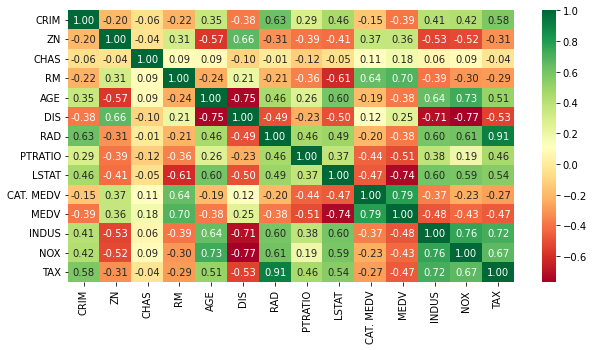

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(bh_rearrange.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

There are high positive correlation between INDUS, NOX, and Tax, as you can see on <br>
the on the lower right side of the plot. <br>
<br>
The predictors whom which might be measuring the same thing are:<br>
PREDICTORS    = COEFFICIENT<br>
AGE : DIS     =   0.75<br>
AGE : NOX     =   0.93<br>
DIS : INDUS   =  -0.71<br>
DIS: NOX      =  -0.77<br>
RAD : TAX     =   0.91<br>
INDUS : NOX   =   0.76<br>
INDUS : TAX   =   0.72<br>
TAX : NOX     =   0.67<br>

###e. Compute the correlation table for the numerical variables and search for highly correlated pairs. These have potential redundancy and can cause multicollinearity. Choose which ones to remove based on this table.

In [ ]:
bh_rearrange.corr()

,CRIM,ZN,CHAS,RM,AGE,DIS,RAD,PTRATIO,LSTAT,CAT. MEDV,MEDV,INDUS,NOX,TAX
CRIM,1.000000,-0.200469,-0.055892,-0.219247,0.352734,-0.379670,0.625505,0.289946,0.455621,-0.151987,-0.388305,0.406583,0.420972,0.582764
ZN,-0.200469,1.000000,-0.042697,0.311991,-0.569537,0.664408,-0.311948,-0.391679,-0.412995,0.365296,0.360445,-0.533828,-0.516604,-0.314563
CHAS,-0.055892,-0.042697,1.000000,0.091251,0.086518,-0.099176,-0.007368,-0.121515,-0.053929,0.108631,0.175260,0.062938,0.091203,-0.035587
RM,-0.219247,0.311991,0.091251,1.000000,-0.240265,0.205246,-0.209847,-0.355501,-0.613808,0.641265,0.695360,-0.391676,-0.302188,-0.292048
AGE,0.352734,-0.569537,0.086518,-0.240265,1.000000,-0.747881,0.456022,0.261515,0.602339,-0.191196,-0.376955,0.644779,0.731470,0.506456
DIS,-0.379670,0.664408,-0.099176,0.205246,-0.747881,1.000000,-0.494588,-0.232471,-0.496996,0.118887,0.249929,-0.708027,-0.769230,-0.534432
RAD,0.625505,-0.311948,-0.007368,-0.209847,0.456022,-0.494588,1.000000,0.464741,0.488676,-0.197924,-0.381626,0.595129,0.611441,0.910228
PTRATIO,0.289946,-0.391679,-0.121515,-0.355501,0.261515,-0.232471,0.464741,1.000000,0.374044,-0.443425,-0.507787,0.383248,0.188933,0.460853
LSTAT,0.455621,-0.412995,-0.053929,-0.613808,0.602339,-0.496996,0.488676,0.374044,1.000000,-0.469911,-0.737663,0.603800,0.590879,0.543993
CAT. MEDV,-0.151987,0.365296,0.108631,0.641265,-0.191196,0.118887,-0.197924,-0.443425,-0.469911,1.000000,0.789789,-0.366276,-0.232502,-0.273687


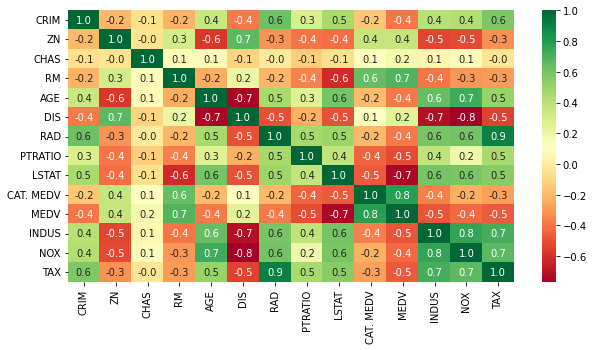

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(bh_rearrange.corr(), annot=True, fmt='.1f', cmap='RdYlGn')
plt.show()

Using the pairs of correlation above [Question D]. I would be removing DIS, AGE, TAX, and INDUS, as these predictors have the lowest correlation compared to the target MEDV. <br>

I would be removing CAT.MEDV as well as the value is related or dependent on the price, which may end up to having two targets.
<br>
<br>

###f. Use two subset selection algorithms: backward and forward to reduce the remaining predictors. Compute the validation performance for both of the selected models. Compare RMSE, MAPE, and mean error, as well as histograms of the errors. Finally, describe the best model.

Full Regression

In [ ]:
excluded_columns = ("DIS","AGE","TAX","INDUS","MEDV", "CAT. MEDV")
predictors = [s for s in bh_df.columns if s not in excluded_columns]

outcome = 'MEDV'

# partition data
x2 = pd.get_dummies(bh_df[predictors], drop_first=True)
y2 = bh_df[outcome]


In [ ]:
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(x2, y2, test_size=0.4, random_state=1)

In [ ]:
bh_lm_2 = LinearRegression()
bh_lm_2.fit(train_x2, train_y2)

LinearRegression()

In [ ]:
print("Intercept:", bh_lm_2.intercept_)
print("coefficient:", bh_lm_2.coef_)

Intercept: 25.557118860088433
coefficient: [-7.93415848e-02 -1.93682893e-03  3.07145259e+00 -9.31004455e+00
  4.02033474e+00  1.08369892e-01 -9.73216169e-01 -4.88795113e-01]


In [ ]:
# print coefficients
print('intercept ', bh_lm_2.intercept_)
print(pd.DataFrame({'Predictor': x2.columns, "coefficient": bh_lm_2.coef_}))

# print performance measures
regressionSummary(train_y2, bh_lm_2.predict(train_x2))

intercept  25.557118860088433
  Predictor  coefficient
0      CRIM    -0.079342
1        ZN    -0.001937
2      CHAS     3.071453
3       NOX    -9.310045
4        RM     4.020335
5       RAD     0.108370
6   PTRATIO    -0.973216
7     LSTAT    -0.488795

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8432
            Mean Absolute Error (MAE) : 3.3075
          Mean Percentage Error (MPE) : -3.8186
Mean Absolute Percentage Error (MAPE) : 17.3342


In [ ]:
pred_y2 = bh_lm_2.predict(train_x2)

print('adjusted r2 : ', adjusted_r2_score(train_y2, pred_y2, bh_lm_2))
print('AIC : ', AIC_score(train_y2, pred_y2, bh_lm_2))
print('BIC : ', BIC_score(train_y2, pred_y2, bh_lm_2))

adjusted r2 :  0.6989314576057903
AIC :  1835.8872867791056
BIC :  1873.0246148341994


Validation Statistic

In [ ]:
bh_lm_pred = bh_lm_2.predict(valid_x2)

result = pd.DataFrame({'Predicted': bh_lm_pred, 'Actual': valid_y2,
                       'Residual': valid_y2 - bh_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y2, bh_lm_pred)

     Predicted  Actual   Residual
307  27.801006    28.2   0.398994
343  27.766371    23.9  -3.866371
47   19.325839    16.6  -2.725839
67   23.432488    22.0  -1.432488
362  17.614672    20.8   3.185328
132  19.684304    23.0   3.315696
292  27.678087    27.9   0.221913
31   18.474354    14.5  -3.974354
218  23.246173    21.5  -1.746173
90   25.386486    22.6  -2.786486
481  26.447175    23.7  -2.747175
344  29.737793    31.2   1.462207
119  20.168047    19.3  -0.868047
66   24.718415    19.4  -5.318415
312  21.483791    19.4  -2.083791
407  18.032444    27.9   9.867556
376  16.410623    13.9  -2.510623
225  37.570346    50.0  12.429654
201  28.582946    24.1  -4.482946
147   8.865761    14.6   5.734239

Regression statistics

                      Mean Error (ME) : 0.2018
       Root Mean Squared Error (RMSE) : 5.4704
            Mean Absolute Error (MAE) : 3.9360
          Mean Percentage Error (MPE) : -4.5788
Mean Absolute Percentage Error (MAPE) : 18.3489


Backward Regression

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x2[variables], train_y2)
    return model

def score_model(model, variables):
    return AIC_score(train_y2, model.predict(train_x2[variables]), model)

best_back_model, best_back_variables = backward_elimination(train_x2.columns, train_model, score_model, verbose=True)

print(best_back_variables)

Variables: CRIM, ZN, CHAS, NOX, RM, RAD, PTRATIO, LSTAT
Start: score=1835.89
Step: score=1833.90, remove ZN
Step: score=1833.90, remove None
['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT']


Forward Regression

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x2[variables], train_y2)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y2, [train_y2.mean()] * len(train_y2), model, df=1)
    return AIC_score(train_y2, model.predict(train_x2[variables]), model)

best_forw_model, best_forw_variables = forward_selection(train_x2.columns, train_model, score_model, verbose=True)

print(best_forw_variables)

Variables: CRIM, ZN, CHAS, NOX, RM, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1835.00, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX']


In [ ]:
print("BACKWARD REGRESSION")
regressionSummary(valid_y2, best_back_model.predict(valid_x2[best_back_variables]))

print("")
print("")
print("")

print("FORWARD REGRESSION")
regressionSummary(valid_y2, best_forw_model.predict(valid_x2[best_forw_variables]))

BACKWARD REGRESSION

Regression statistics

                      Mean Error (ME) : 0.2021
       Root Mean Squared Error (RMSE) : 5.4748
            Mean Absolute Error (MAE) : 3.9354
          Mean Percentage Error (MPE) : -4.5849
Mean Absolute Percentage Error (MAPE) : 18.3404



FORWARD REGRESSION

Regression statistics

                      Mean Error (ME) : 0.1860
       Root Mean Squared Error (RMSE) : 5.5047
            Mean Absolute Error (MAE) : 3.9434
          Mean Percentage Error (MPE) : -4.5084
Mean Absolute Percentage Error (MAPE) : 18.4374


By analyzing the MAPE values for the backward and forward regression models, it can be determined that the backward regression model is better as it has the lowest MAPE and RMSE values of 18.34 and 5.47 respective; however, forward regression has a slightly lower value of 0.18, which is closer to the actual values, as compared to backward regression's value of 0.20.
<br>
<br>

In [ ]:
# get error/residual
residual_valid_forw = valid_y2 - best_forw_model.predict(valid_x2[best_forw_variables])
residual_train_forw = train_y2 - best_forw_model.predict(train_x2[best_forw_variables])
residual_valid_back = valid_y2 - best_forw_model.predict(valid_x2[best_forw_variables])
residual_train_back = train_y2 - best_forw_model.predict(train_x2[best_forw_variables])

Text(0.5, 1.0, 'Residual Distribution Validation Backward')

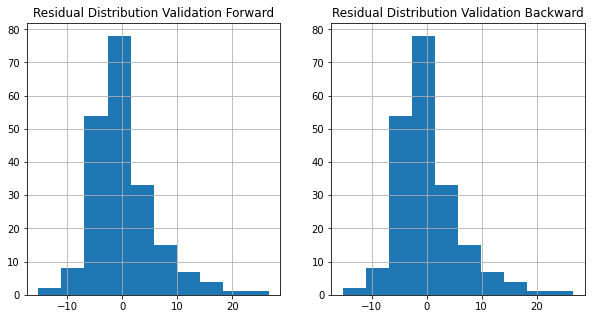

In [ ]:
hist, ax = plt.subplots(nrows=1, ncols =2)
hist.set_size_inches(10,5)
residual_valid_forw.hist(ax=ax[0])
residual_valid_back.hist(ax=ax[1])
ax[0].set_title("Residual Distribution Validation Forward")
ax[1].set_title("Residual Distribution Validation Backward")

Both histogram plots appear to have a slight right skewness, and their shapes and distributions are quite similar. This indicates that the majority of the data points are focused on the right side of the plot.